【回顾&引言】前面一章的内容大家可以感觉到我们主要是对基础知识做一个梳理，让大家了解数据分析的一些操作，主要做了数据的各个角度的观察。那么在这里，我们主要是做数据分析的流程性学习，主要是包括了数据清洗以及数据的特征处理，数据重构以及数据可视化。这些内容是为数据分析最后的建模和模型评价做一个铺垫。

#### 开始之前，导入numpy、pandas包和数据

In [1]:
#加载所需的库
import numpy as np
import pandas as pd

In [63]:
#加载数据train.csv
df = pd.read_csv("train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 2 第二章：数据清洗及特征处理
我们拿到的数据通常是不干净的，所谓的不干净，就是数据中有缺失值，有一些异常点等，需要经过一定的处理才能继续做后面的分析或建模，所以拿到数据的第一步是进行数据清洗，本章我们将学习缺失值、重复值、字符串和数据转换等操作，将数据清洗成可以分析或建模的亚子。

### 2.1 缺失值观察与处理
我们拿到的数据经常会有很多缺失值，比如我们可以看到Cabin列存在NaN，那其他列还有没有缺失值，这些缺失值要怎么处理呢

#### 2.1.1 任务一：缺失值观察
(1) 请查看每个特征缺失值个数  
(2) 请查看Age， Cabin， Embarked列的数据
以上方式都有多种方式，所以大家多多益善

In [60]:
#写入代码
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
#写入代码
df['Age'].isnull().sum()

177

In [7]:
#写入代码
df['Cabin'].isna().sum()

687

In [11]:
df['Embarked'].isnull().sum()

2

In [12]:
df[['Age','Cabin','Embarked']]

,Age,Cabin,Embarked
0,22.0,NaN,S
1,38.0,C85,C
2,26.0,NaN,S
3,35.0,C123,S
4,35.0,NaN,S
...,...,...,...
886,27.0,NaN,S
887,19.0,B42,S
888,NaN,NaN,S
889,26.0,C148,C


In [10]:
#判断不为空的
non_missing_values = df[df['Age'].notna()]
non_missing_values

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


#### 2.1.2 任务二：对缺失值进行处理
(1)处理缺失值一般有几种思路

(2) 请尝试对Age列的数据的缺失值进行处理

(3) 请尝试使用不同的方法直接对整张表的缺失值进行处理  


In [13]:
#处理缺失值的一般思路：
#提醒：可使用的函数有--->dropna函数与fillna函数
df1 = df.dropna() # 删除所有有空值的行
df1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S


In [14]:
df1.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [15]:
df2 = df.dropna(axis=1) # 删除所有有空值的列
df2.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000
4,5,0,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500


In [16]:
df2.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
SibSp          0
Parch          0
Ticket         0
Fare           0
dtype: int64

In [18]:
#写入代码
df1 = df.dropna(subset=['Age'])
df1.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          529
Embarked         2
dtype: int64

In [19]:
df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [24]:
#写入代码
df['Age'].fillna(value=0, inplace = True)
df['Age'].describe()

count    891.000000
mean      23.799293
std       17.596074
min        0.000000
25%        6.000000
50%       24.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64

In [29]:
df = pd.read_csv("train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [30]:
df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [31]:
#写入代码 线性插值填充
df['Age'].interpolate(method='linear', axis=0,inplace=True)
df['Age'].describe()


count    891.000000
mean      29.726061
std       13.902353
min        0.420000
25%       21.000000
50%       28.500000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [32]:
df = pd.read_csv("train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [34]:
#用下一个值来填充，向前填充 ffill用上一个值来填充，向后填充
df['Age'].fillna(method='bfill', inplace=True) 
df['Age'].describe()

count    891.000000
mean      29.870561
std       14.597668
min        0.420000
25%       21.000000
50%       29.000000
75%       39.000000
max       80.000000
Name: Age, dtype: float64

【思考1】dropna和fillna有哪些参数，分别如何使用呢?  

【思考】检索空缺值用`np.nan`,`None`以及`.isnull()`哪个更好，这是为什么？如果其中某个方式无法找到缺失值，原因又是为什么？

#思考回答

np.nan和都None可以用来表示 DataFrame 中的缺失值。

但是，np.nan通常是首选，因为它是一个特殊值，被许多处理数字数据的库和方法识别

而None它是一个更通用的 Python 值，可能不会被所有库和方法识别为缺失值。

最好使用np.nan表示缺失数值和isnull()方法来检查 DataFrame 中的缺失值。


【参考】https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html

【参考】https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html

### 2.2 重复值观察与处理
由于这样那样的原因，数据中会不会存在重复值呢，如果存在要怎样处理呢

#### 2.2.1 任务一：请查看数据中的重复值

In [36]:
#写入代码
df.duplicated().sum()


0

In [39]:
df.duplicated(subset=['Age', 'Sex','Survived']).sum() #指定某一列看是否有重复值


660

In [50]:
df1 = pd.DataFrame({'A': [1, 2, 2, 4],
                   'B': [5, 6, 6, 8],
                   'C': [9, 10, 10, 12]})
df1

,A,B,C
0,1,5,9
1,2,6,10
2,2,6,10
3,4,8,12


In [47]:
df1.duplicated()

0    False
1    False
2     True
3    False
dtype: bool

#### 2.2.2 任务二：对重复值进行处理
(1)重复值有哪些处理方式呢？

(2)处理我们数据的重复值

方法多多益善

In [49]:
#重复值有哪些处理方式：
#删除重复行
df1.drop_duplicates(inplace=True)
df1

,A,B,C
0,1,5,9
1,2,6,10
3,4,8,12


In [52]:
#写入代码
duplicate_rows = df1.duplicated()
df1 = df1[~duplicate_rows]
df1

,A,B,C
0,1,5,9
1,2,6,10
3,4,8,12


####  2.2.3 任务三：将前面清洗的数据保存为csv格式

In [72]:
#加载数据train.csv
df = pd.read_csv("train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [73]:
#写入代码
#因为数据之间没有前后的逻辑关系，故将年龄补为0，其他再有的空值直接删掉
df['Age'].fillna(0, inplace=True)
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [74]:
df.shape

(891, 12)

In [75]:
df.dropna(inplace=True)
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [76]:
df.shape

(202, 12)

In [77]:
df.to_csv("test_clear.csv",encoding='GBK')

### 2.3 特征观察与处理
我们对特征进行一下观察，可以把特征大概分为两大类：  
数值型特征：Survived ，Pclass， Age ，SibSp， Parch， Fare，其中Survived， Pclass为离散型数值特征，Age，SibSp， Parch， Fare为连续型数值特征  
文本型特征：Name， Sex， Cabin，Embarked， Ticket，其中Sex， Cabin， Embarked， Ticket为类别型文本特征，数值型特征一般可以直接用于模型的训练，但有时候为了模型的稳定性及鲁棒性会对连续变量进行离散化。文本型特征往往需要转换成数值型特征才能用于建模分析。

#### 2.3.1 任务一：对年龄进行分箱（离散化）处理
(1) 分箱操作是什么？

(2) 将连续变量Age平均分箱成5个年龄段，并分别用类别变量12345表示  

(3) 将连续变量Age划分为[0,5) [5,15) [15,30) [30,50) [50,80)五个年龄段，并分别用类别变量12345表示  

(4) 将连续变量Age按10% 30% 50% 70% 90%五个年龄段，并用分类变量12345表示

(5) 将上面的获得的数据分别进行保存，保存为csv格式

In [97]:
df = pd.read_csv('test_clear.csv')

(array([29.,  3., 26., 35., 40., 23., 25., 15.,  5.,  1.]),
 array([ 0.,  8., 16., 24., 32., 40., 48., 56., 64., 72., 80.]),
 <BarContainer object of 10 artists>)

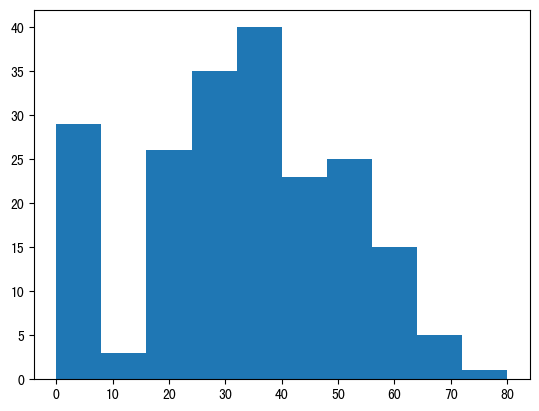

In [98]:
from matplotlib import pyplot as plt
plt.hist(df['Age'])

In [105]:
labels = [1,2,3,4,5]
df['Agebins'] = pd.cut(df['Age'], bins=5, labels=labels)
df['Agebins']

0      3
1      3
2      4
3      1
4      4
      ..
197    3
198    3
199    4
200    2
201    2
Name: Agebins, Length: 202, dtype: category
Categories (5, int64): [1 < 2 < 3 < 4 < 5]

In [106]:
df.to_csv('test_average.csv', encoding='GBK')

In [107]:
bins = [0,5,15,30,50,80]
labels = [1,2,3,4,5]
df['Agebins'] = pd.cut(df['Age'], bins=bins,right=False, labels=labels)# 去掉labels可以看到区间范围
df['Agebins']

0      4
1      4
2      5
3      1
4      5
      ..
197    4
198    4
199    5
200    3
201    3
Name: Agebins, Length: 202, dtype: category
Categories (5, int64): [1 < 2 < 3 < 4 < 5]

In [108]:
df.to_csv('test_cut.csv', encoding='GBK')

In [103]:
q = [0,0.1,0.3,0.5,0.7,0.9,1]
labels = [1,2,3,4,5,6]
df['Agebins'] = pd.qcut(df['Age'], q=q,labels=labels)# 去掉labels可以看到区间范围
df['Agebins']

0      4
1      4
2      5
3      2
4      6
      ..
197    5
198    3
199    6
200    2
201    3
Name: Agebins, Length: 202, dtype: category
Categories (6, int64): [1 < 2 < 3 < 4 < 5 < 6]

In [104]:
#写入代码
df.to_csv('test_precent.csv', encoding='GBK')


【参考】https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.cut.html

【参考】https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.qcut.html

#### 2.3.2 任务二：对文本变量进行转换
(1) 查看文本变量名及种类  
(2) 将文本变量Sex， Cabin ，Embarked用数值变量12345表示  
(3) 将文本变量Sex， Cabin， Embarked用one-hot编码表示

In [ ]:
#写入代码




In [ ]:
#写入代码




In [ ]:
#写入代码




#### 2.3.3 任务三：从纯文本Name特征里提取出Titles的特征(所谓的Titles就是Mr,Miss,Mrs等)

In [ ]:
#写入代码




In [ ]:
#保存最终你完成的已经清理好的数据
